# Decentralized Stochastic Gradient Descent A

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from utils import build_W, QuadraticDataset, LogisticDataset

In [2]:
path_results = "./results"
if not os.path.exists(path_results):
    os.makedirs(path_results)

The goal is to solve
$$
\underset{\theta\in\mathbb{R}^d}{\arg\min} \frac1m \sum_{k = 1}^m f_k(\theta).
$$
We use variant A of DSGD:
$$
\theta_k^{t+1} = \sum_{l = 1}^m W_{k, l} \big( \theta_l^t - \gamma \nabla f_l(\theta_l^t) \big).
$$

## Parameters

In [3]:
# Agent parameters
m = 16 # Number of agents
n = 10 # Number of samples per agent
d = 2 # Dimension of the problem

# Function parameters
L = 1.
mu = 0.1

# Algorithm parameters
n_iter = 30000
gamma = 1e-1

# Gossip matrix
W = build_W(m, type = "Four")

## Quadratic Dataset
$$
f_k(\theta)
= \frac{1}{2n} \sum_{i = 1}^n \| A_{k, i}^{1/2} (\theta - \theta_{k, i}^*) \|^2.
$$

In [4]:
dataset = QuadraticDataset(m = m, n = n, d = d, gamma = gamma, W = W, n_iter = n_iter, L = L, mu = mu)
dataset.run()

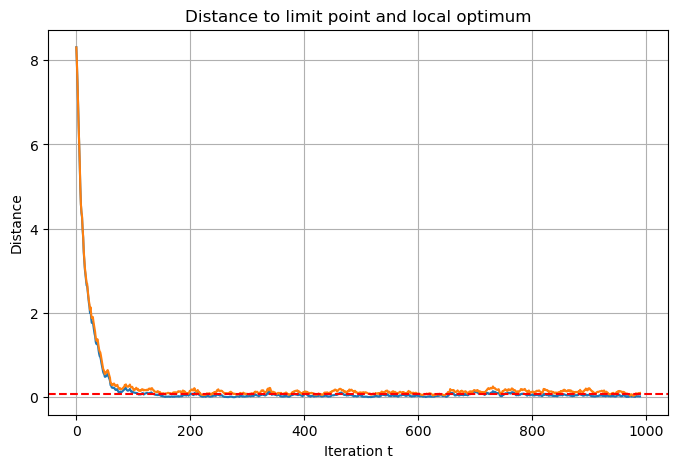

In [5]:
# dataset.plot_distance(idx_end = 1000, legend = False, save = path_results + "/Det_A_Quad")
dataset.plot_distance(idx_end = 1000, legend = False, save = os.path.join(path_results, "Det_A_Quad"))

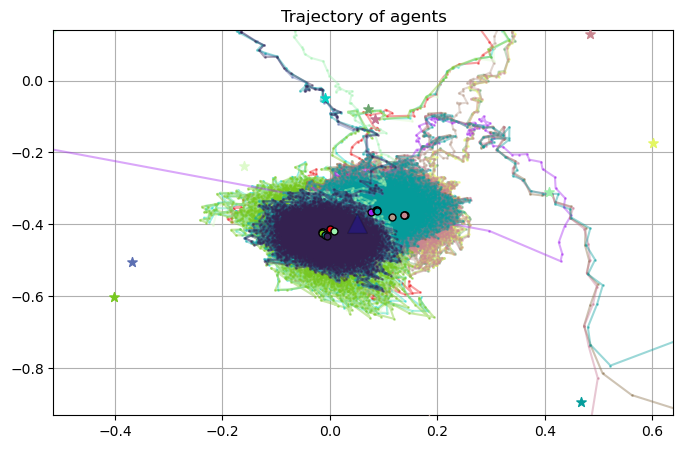

In [6]:
dataset.plot_2D(legend = False, save = os.path.join(path_results, "Det_A_Quad_Trajectory"))

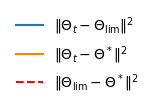

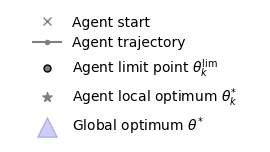

In [7]:
dataset.plot_distance_legend_only(path = os.path.join(path_results, "Det_A_Legend"))
dataset.plot_legend_only(path = os.path.join(path_results, "Det_A_Legend_Trajectory"))

In [8]:
# list_gamma = np.logspace(-2.8, 0, 30)
# list_W = [build_W(m, type = "Four", strength = 0.2),
#           0.8 * build_W(m, type = "Four", strength = 0.9) + 0.2 * build_W(m, type = "FL"),
#           0.5 * build_W(m, type = "Four", strength = 0.9) + 0.5 * build_W(m, type = "FL"),
#           0.2 * build_W(m, type = "Four", strength = 0.9) + 0.8 * build_W(m, type = "FL"),
#           build_W(m, type = "FL")]
# colors = ["orange", "blue", "green", "red", "purple"]

# dataset = QuadraticDataset(m = m, n = n, d = d, gamma = list_gamma[0], W = list_W[0], n_iter = n_iter, L = L, mu = mu)
# theta_star = dataset.theta_star.copy()
# Theta_star = np.tile(theta_star, (m, 1))

# result = np.zeros((len(list_W), len(list_gamma)))
# handles = []

# for i, W_ in enumerate(list_W):
#     for j, gamma_ in enumerate(list_gamma):
#         dataset.set_W(W_)
#         dataset.set_gamma(gamma_)
#         dataset.run()

#         history = dataset.history.copy()
#         result[i, j] = ((history[-1, :, :] - Theta_star)**2).mean()

# plt.figure(figsize = (8, 6))

# for i, W_ in enumerate(list_W):
#     eigenvalue = np.sort(abs(np.linalg.eigvals(W_)))[-2]
#     plt.semilogx(list_gamma, result[i, :], label = r"$\lambda_2(W) = %.2f$" % eigenvalue, color = colors[i])
#     handles.append(Line2D([0], [0], label=r"$\lambda_2(W) = %.2f$" % eigenvalue, color=colors[i]))
# plt.xlabel(r'Step size $\gamma$')
# plt.ylabel(r"$\| \Theta^{lim} - \Theta^* \|^2$")
# plt.title("Convergence of the limit point - DSGD A - Quadratic")
# plt.grid()

# plt.savefig(os.path.join(path_results, "Det_A_eigenvalues_Quad.pdf"), dpi=200)
# plt.savefig(os.path.join(path_results, "Det_A_eigenvalues_Quad.png"), dpi=200)

# plt.show()

# # Plotting the legend for eigenvalues

# plt.figure(figsize=(7.5, 0.5))
# plt.legend(handles=handles, loc='center', frameon=False, ncol=len(handles))
# plt.axis('off')
# plt.tight_layout()
# plt.savefig(os.path.join(path_results, "Det_A_eigenvalues_Legend.pdf"), dpi=200)

## Logistic Dataset

Here, we have
$$
f_k(\theta)
= \frac{1}{2n} \sum_{i = 1}^n \log(1 + \exp(\langle\theta, \theta_{k, i}^* \rangle)) + \frac{\mu}{2} \| \theta \|^2.
$$

In [9]:
dataset = LogisticDataset(m = m, n = n, d = d, gamma = gamma, W = W, n_iter = n_iter, L = L, mu = mu)
dataset.run()

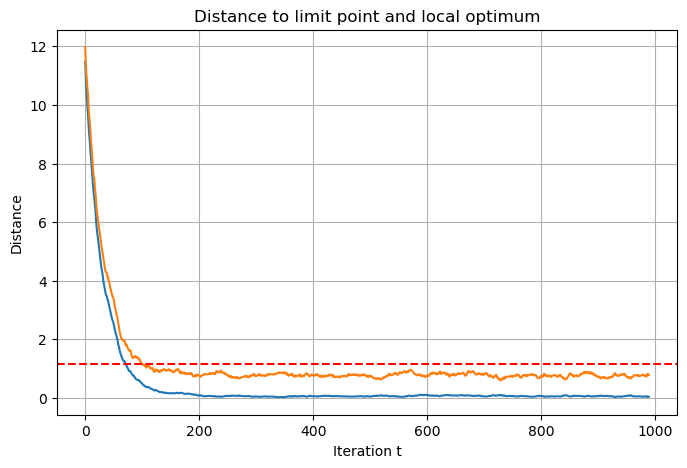

In [10]:
dataset.plot_distance(idx_end = 1000, legend = False, save = os.path.join(path_results, "Det_A_Logi"))

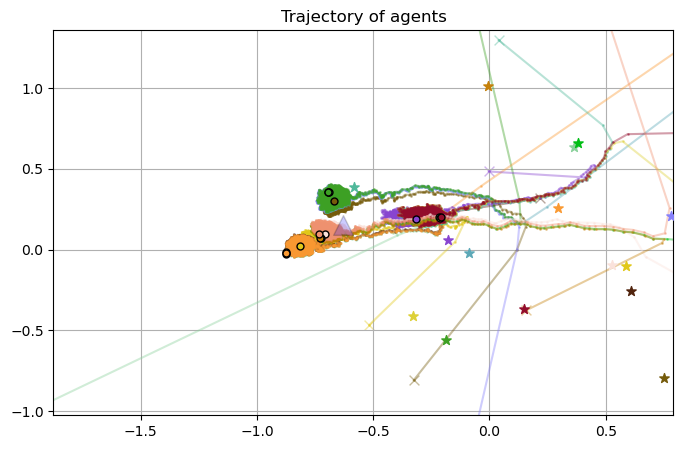

In [11]:
dataset.plot_2D(legend = False, save = os.path.join(path_results, "Det_A_Logi_Trajectory"), delta = 1.)

In [12]:
# dataset = LogisticDataset(m = m, n = n, d = d, gamma = list_gamma[0], W = list_W[0], n_iter = n_iter, L = L, mu = mu)
# theta_star = dataset.theta_star.copy()
# Theta_star = np.tile(theta_star, (m, 1))

# result = np.zeros((len(list_W), len(list_gamma)))

# for i, W_ in enumerate(list_W):
#     for j, gamma_ in enumerate(list_gamma):
#         dataset.set_W(W_)
#         dataset.set_gamma(gamma_)
#         dataset.run()

#         history = dataset.history.copy()
#         result[i, j] = ((history[-1, :, :] - Theta_star)**2).mean()

# plt.figure(figsize = (8, 6))

# for i, W_ in enumerate(list_W):
#     eigenvalue = np.sort(abs(np.linalg.eigvals(W_)))[-2]
#     plt.semilogx(list_gamma, result[i, :], label = r"$\lambda_2 = %.2f$" % eigenvalue, color = colors[i])
# plt.xlabel(r'Step size $\gamma$')
# plt.ylabel(r"$\| \Theta^{lim} - \Theta^* \|^2$")
# plt.title("Convergence of the limit point - DSGD A - Logistic")
# plt.grid()

# plt.savefig(os.path.join(path_results, "Det_A_eigenvalues_Logi.pdf"), dpi=200)
# plt.savefig(os.path.join(path_results, "Det_A_eigenvalues_Logi.png"), dpi=200)

# plt.show()